In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [148]:
data = pd.read_csv(
    'games-data.csv',
    parse_dates = ['r-date']
)

In [149]:
data.shape

(17944, 10)

In [150]:
data.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,1999-09-08,98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        17944 non-null  object        
 1   platform    17944 non-null  object        
 2   r-date      17944 non-null  datetime64[ns]
 3   score       17944 non-null  int64         
 4   user score  17944 non-null  object        
 5   developer   17944 non-null  object        
 6   genre       17944 non-null  object        
 7   players     17922 non-null  object        
 8   critics     17944 non-null  int64         
 9   users       17944 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.4+ MB


In [152]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17939    False
17940    False
17941    False
17942    False
17943    False
Length: 17944, dtype: bool

In [153]:
data.isna()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17939,False,False,False,False,False,False,False,False,False,False
17940,False,False,False,False,False,False,False,False,False,False
17941,False,False,False,False,False,False,False,False,False,False
17942,False,False,False,False,False,False,False,False,False,False


In [154]:
data.columns = (
    data.columns.str.lower()
                .str.strip()
                .str.replace(' ', '_')
)
data.head()

,name,platform,r-date,score,user_score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,1999-09-08,98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [155]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') * 10
data.loc[ data['user_score'].isna(), 'user_score' ] = data.loc[ data['user_score'].isna(), 'score' ]
data.head()

,name,platform,r-date,score,user_score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,1999-09-08,98,85.0,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


<Axes: >

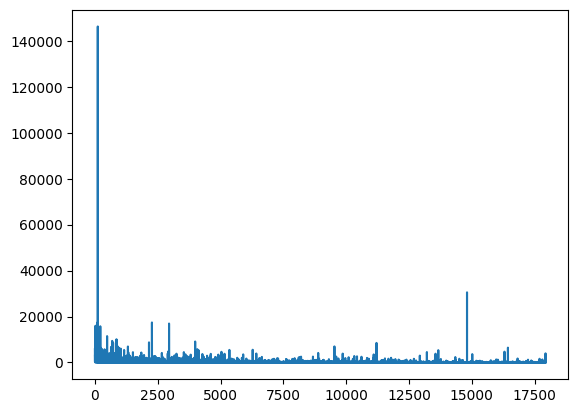

In [156]:
data['users'].plot()

In [157]:
data.loc [ data['users'] > 100000, 'users' ] = data.loc[ data['users'] > 100000, 'users' ] // 10

<Axes: >

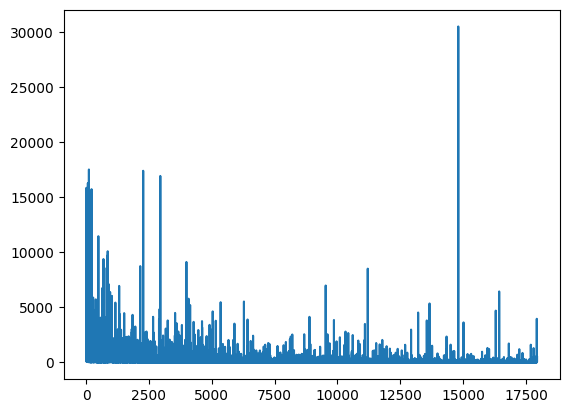

In [158]:
data['users'].plot()

In [159]:
data.to_csv('clean_data.csv')

In [160]:
data.value_counts()

name                                   platform      r-date      score  user_score  developer              genre                                                               players                critics  users
Etrian Odyssey III: The Drowned City   DS            2010-09-21  77     84.0        Atlus                  Role-Playing,First-Person,First-Person,Western-Style                No info                23       26       2
Call of Duty: Finest Hour              Xbox          2004-11-16  73     76.0        SparkUnlimited         Action,Shooter,First-Person,Historic                                16  Online             55       28       2
El Shaddai: Ascension of the Metatron  PlayStation3  2011-08-16  78     76.0        IgnitionEntertainment  Action,Action Adventure,General,Fantasy,General,Fantasy             No info                46       44       2
Blast Works: Build, Trade, Destroy     Wii           2008-06-11  78     77.0        BudCat                 Action,Shooter,Shooter,Scr

In [161]:
data.isnull().sum()

name           0
platform       0
r-date         0
score          0
user_score     0
developer      0
genre          0
players       22
critics        0
users          0
dtype: int64

In [162]:
data = data.dropna(subset=['players'], axis = 0)
data = data.reset_index (drop=True)
data.isnull().sum()

name          0
platform      0
r-date        0
score         0
user_score    0
developer     0
genre         0
players       0
critics       0
users         0
dtype: int64

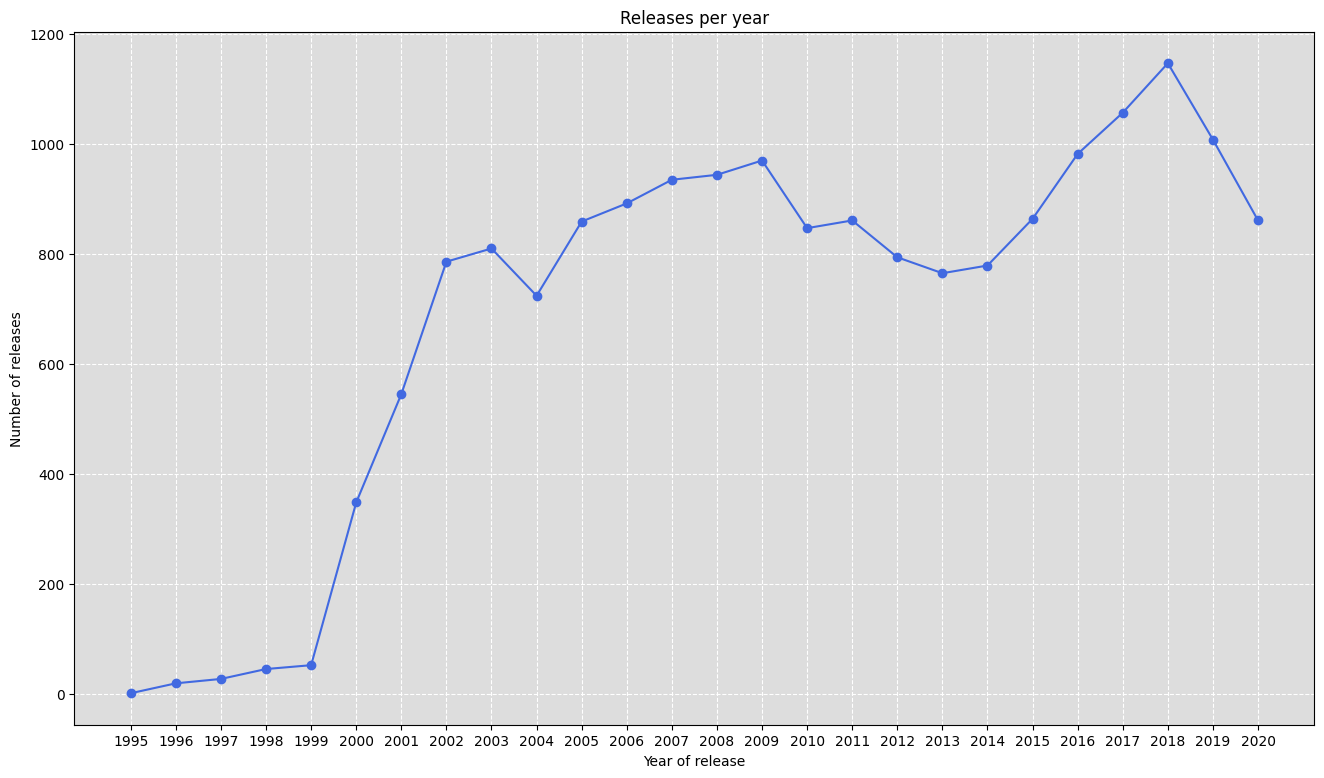

In [163]:
releases_per_year_count = data['r-date'].groupby(pd.DatetimeIndex(data['r-date']).year).count()

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(releases_per_year_count.index, releases_per_year_count.values, marker='o', linestyle='-', color='royalblue')
ax.set_facecolor('#dddddd')
ax.set_xticks(np.arange(releases_per_year_count.index.min(), releases_per_year_count.index.max() +1, 1))
ax.set_xlabel('Year of release')
ax.set_ylabel('Number of releases')
ax.set_title('Releases per year')
ax.grid(color='white', linestyle='--')
plt.show()



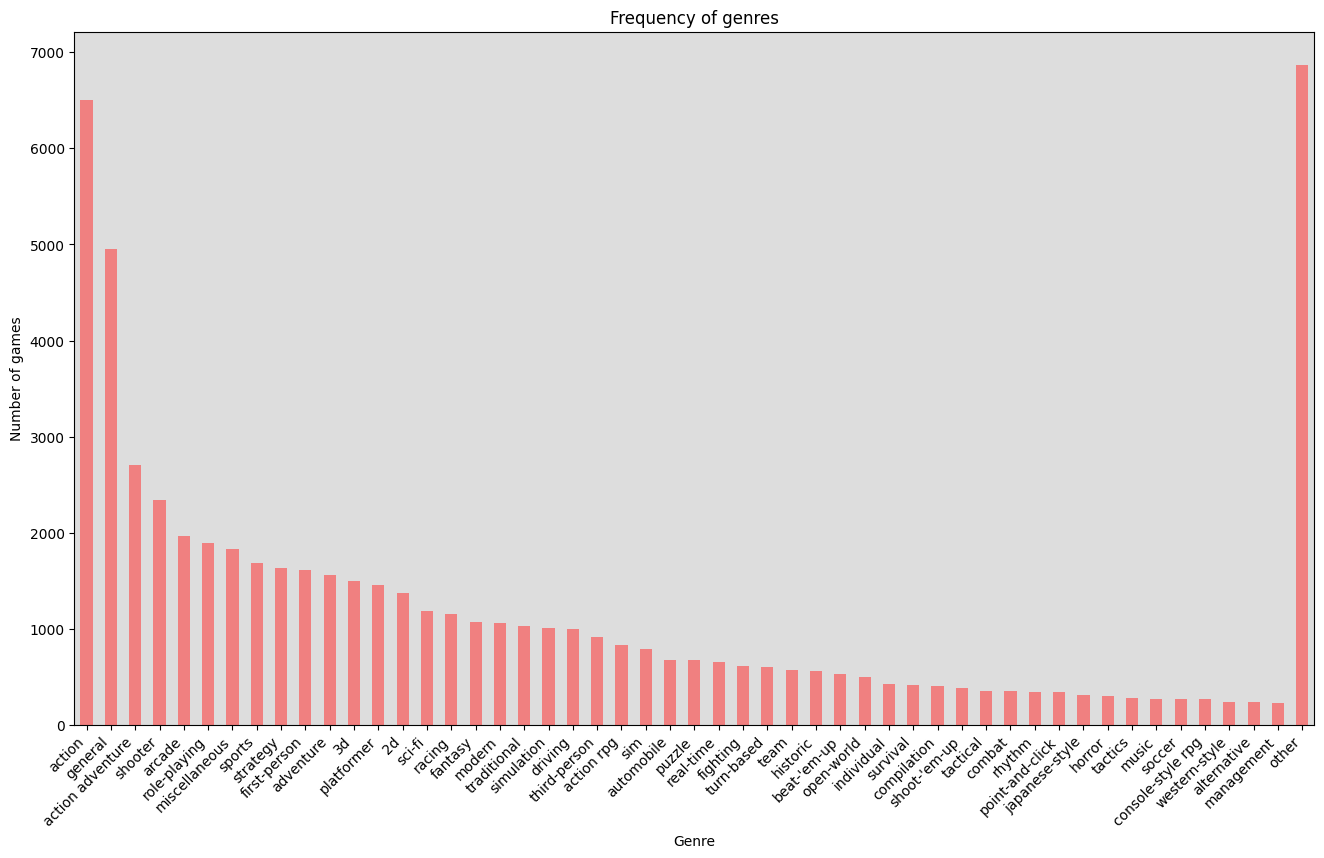

In [164]:
genres = data.assign(genre=data['genre'].str.split(',')).explode('genre')
genres['genre'] = genres['genre'].str.strip().str.lower()
genres = genres.dropna()
genres = genres.reset_index().drop_duplicates(['index','genre'])
genres_count = genres['genre'].value_counts()
top_genres_count = genres['genre'].value_counts().head(50)
other_genres_count = genres_count[50:].sum()
top_genres_count['other'] = other_genres_count

fig, ax = plt.subplots(figsize=(16,9))
top_genres_count.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_facecolor('#dddddd')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of games')
ax.set_title('Frequency of genres')
plt.xticks(rotation=45, ha='right')
plt.show()

In [165]:
score_vs_user_score = data.groupby('platform')[['score','user_score']].mean()
score_vs_user_score.head()

,score,user_score
platform,,
3DS,69.607500,70.272500
DS,66.480822,69.386301
Dreamcast,73.580645,78.733871
GameBoyAdvance,68.483070,73.047404
GameCube,70.747788,74.367257


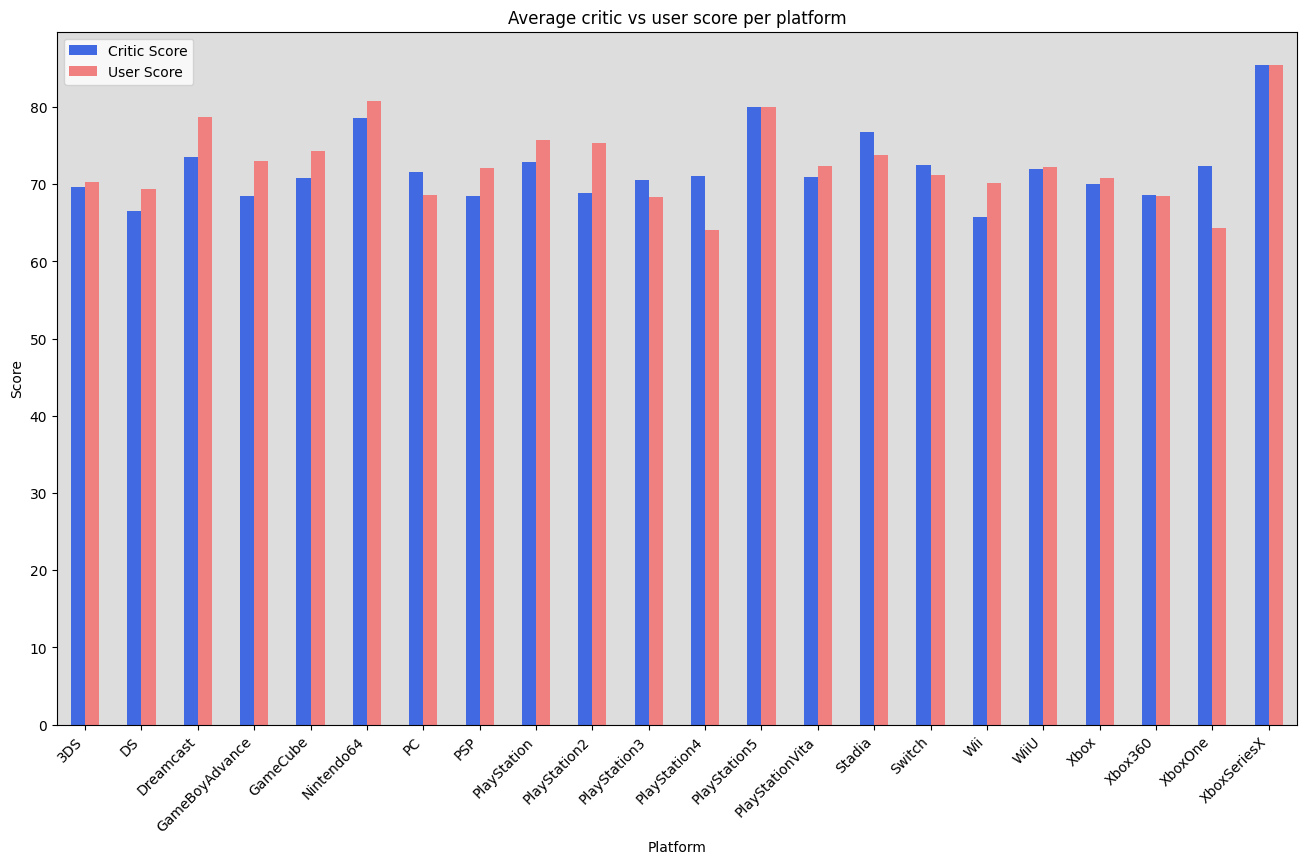

In [166]:
fig, ax = plt.subplots(figsize = (16,9))

score_vs_user_score.plot(kind='bar', ax=ax, color=['royalblue', 'lightcoral'])
ax.set_facecolor('#dddddd')
ax.set_xlabel('Platform')
ax.set_ylabel('Score')
ax.set_title('Average critic vs user score per platform')
plt.legend(['Critic Score', 'User Score'])
plt.xticks(rotation = 45, ha='right')
plt.show()


In [167]:
data.head() 

,name,platform,r-date,score,user_score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,1999-09-08,98,85.0,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [124]:
top_played_games = data [['name','users']].sort_values(by='users', ascending=False).head(15)

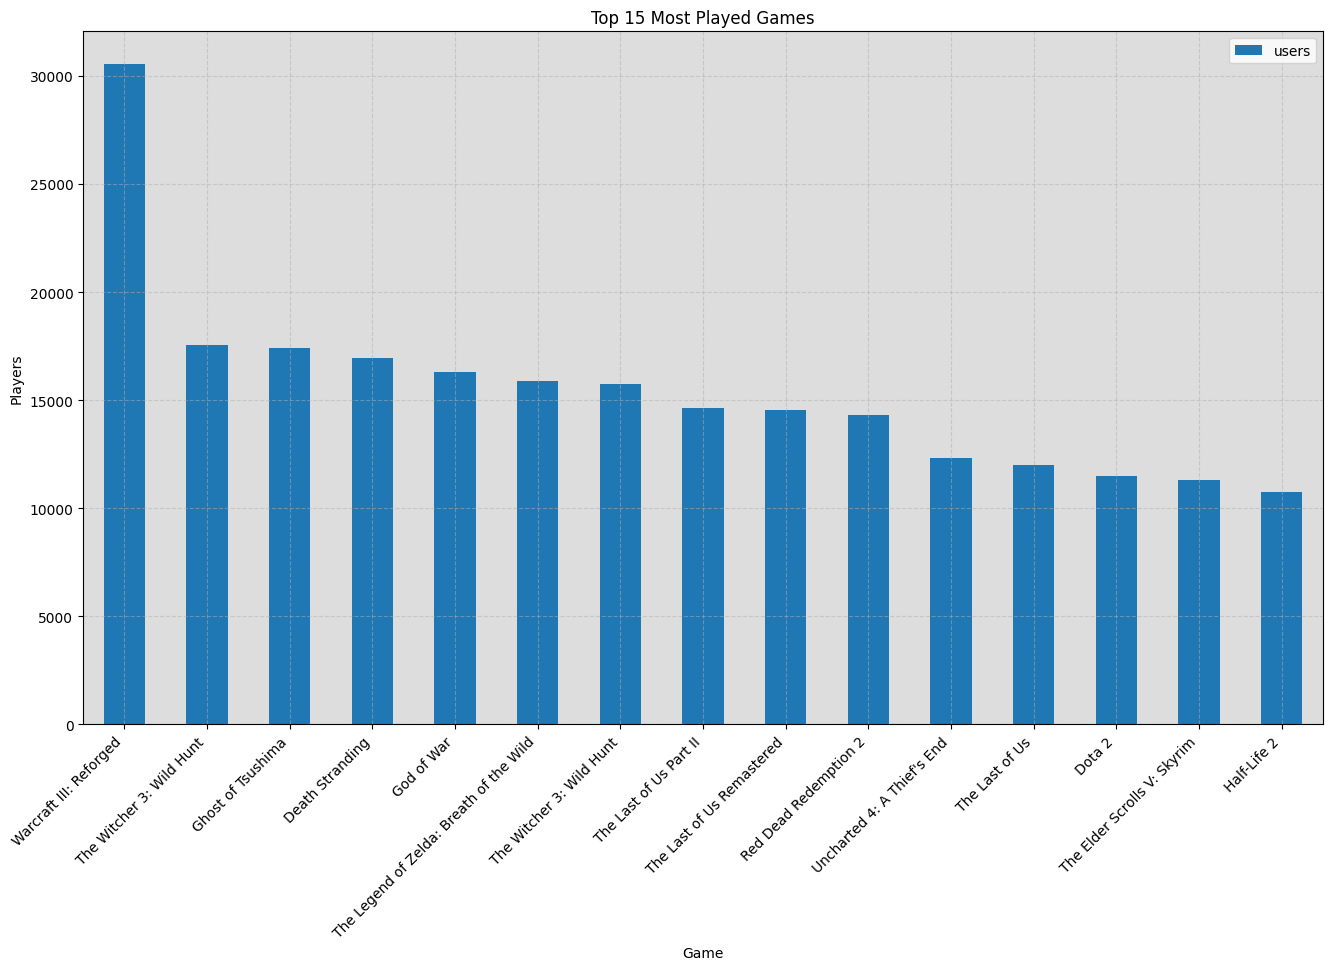

In [125]:
top_played_games = data [['name','users']].sort_values(by='users', ascending=False).head(15).set_index('name')

fig, ax = plt.subplots(figsize=(16,9))

top_played_games.plot(kind='bar', ax=ax)
ax.set_facecolor('#dddddd')
ax.set_xlabel('Game')
ax.set_ylabel('Players')
ax.set_title('Top 15 Most Played Games')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticklabels(top_played_games.index, rotation=45, ha='right')
plt.show()

In [143]:
users_per_developer = data.groupby(by='developer')['users'].sum().sort_values(ascending=False).head(20)
users_per_developer

developer
BlizzardEntertainment    82600
Nintendo                 82108
ValveSoftware            80159
NaughtyDog               71663
BioWare                  71048
UbisoftMontreal          63260
BethesdaGameStudios      58603
Capcom                   58471
CDProjektRedStudio       58313
EADICE                   57892
InfinityWard             48272
SquareEnix               44839
FromSoftware             43027
RockstarNorth            39955
KojimaProductions        30179
GameFreak                26769
TelltaleGames            26054
SuckerPunch              25350
Ubisoft                  24671
SCESantaMonica           23691
Name: users, dtype: int64

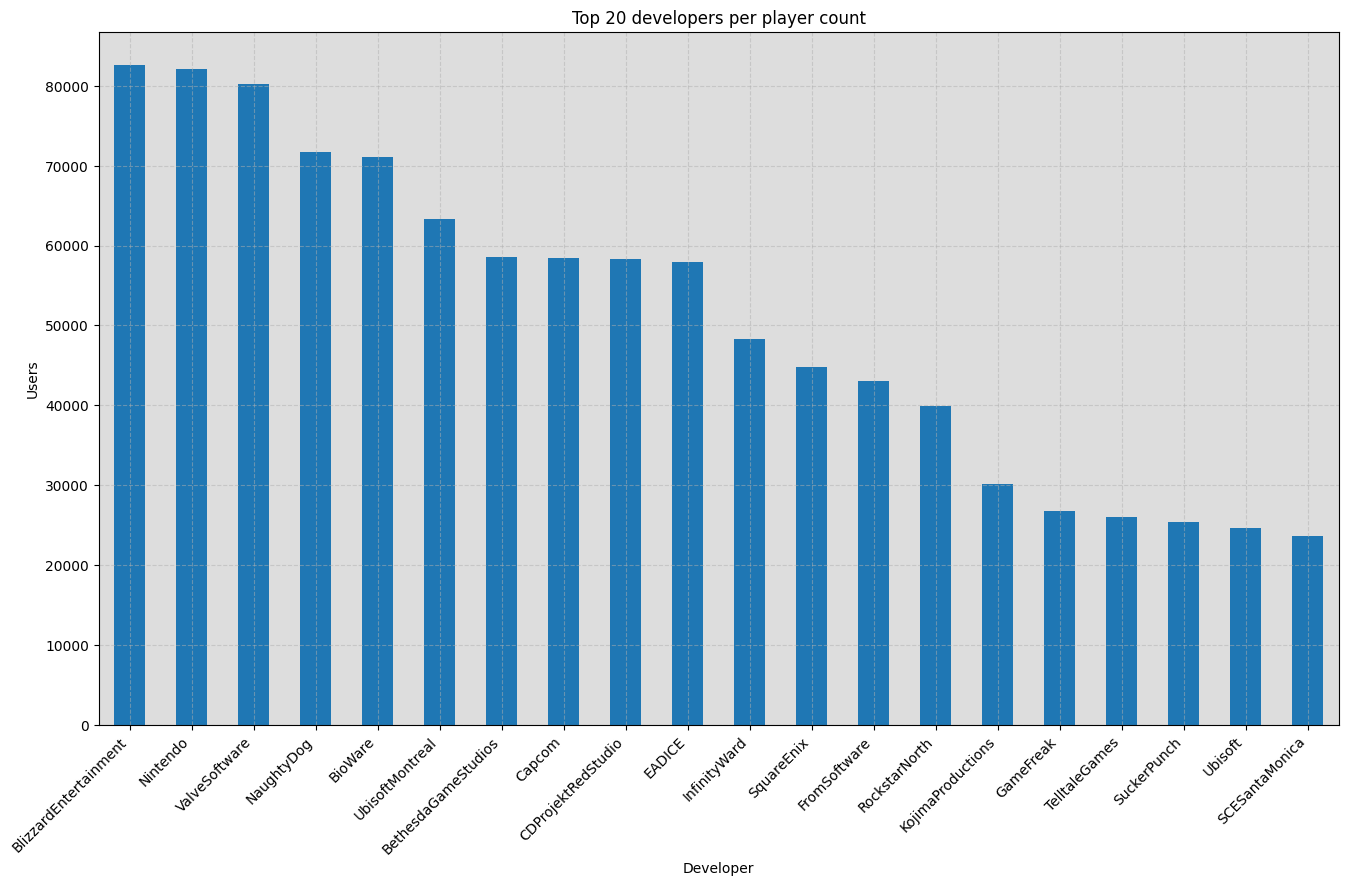

In [146]:
fig, ax = plt.subplots(figsize=(16,9))

users_per_developer.plot(kind='bar', ax=ax)
ax.set_facecolor('#dddddd')
ax.set_xlabel('Developer')
ax.set_ylabel('Users')
ax.set_title('Top 20 developers per player count')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticklabels(users_per_developer.index,rotation=45,ha='right')
plt.show()